In [38]:
import pandas as pd

data_dir = "data/processed/"

df_election_totals = pd.read_csv(data_dir + "election_totals.csv")
df_election_totals.set_index("year", inplace=True)

df_registration_totals = pd.read_csv(data_dir + "registration_totals.csv")
df_registration_totals.set_index("year", inplace=True)

<AxesSubplot:title={'center':'Turnout By Party'}, xlabel='year'>

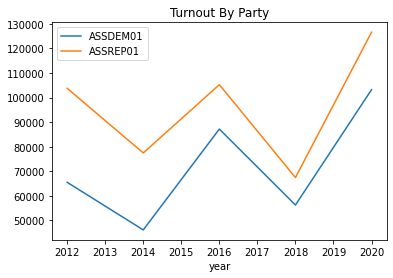

In [20]:
df_election_totals[["ASSDEM01", "ASSREP01"]].plot.line(title = "Votes By Party")

<AxesSubplot:title={'center':'Registration by Party'}, xlabel='year'>

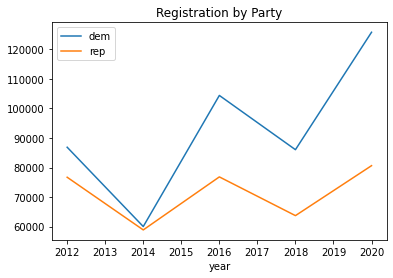

In [39]:
df_registration_totals[["dem", "rep"]].plot.line(title = "Registration by Party")